# Height vs Weight

Welcome to Core Workshop 4: Polynomial Regression's live code session

Today we are dealing with a csv toy dataset taken from Kaggle: [https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression](https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression), which records the **weight** and **height** of people (they are made up). The data is already cleaned.

---

#### In this session we are using this data to build a `polynomial regression` model, trying to predict the **height** by a given **weight**, using k-folds cross validation method to find optimal hyperparameters

# Explore

Text(0.5, 1.0, 'Height VS Weight')

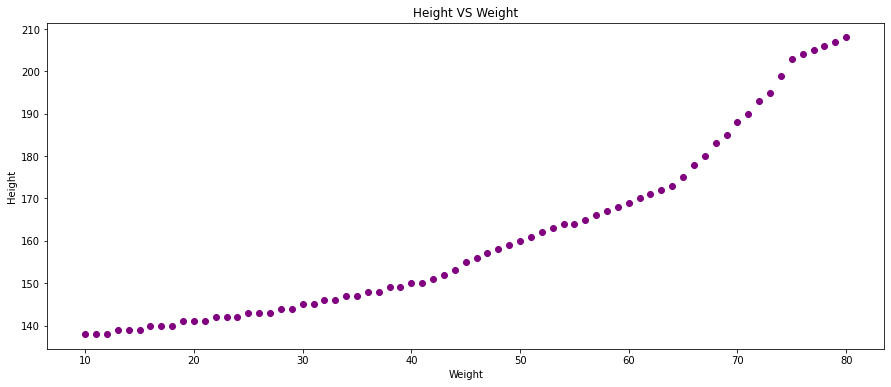

In [1]:
# Repeat previous processing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/HeightVsWeight.csv")

x = df.iloc[:, :1]
y = df.iloc[:, 1:]

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")


# Split using k-folds

In [2]:
# We are going to split the training data into 5 folds, which is common number used for small datasets

from sklearn.model_selection import KFold, train_test_split

# Regular train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

# Build 5-folds split, split by index
kf5 = KFold(n_splits=5)

# Save the train index and validate index
t_v_indexes = []

for train_index, validation_index in kf5.split(x_train):
    t_v_indexes.append([train_index, validation_index])
    print("Train: {} | Validate: {}".format(train_index, validation_index))


Train: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55] | Validate: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55] | Validate: [12 13 14 15 16 17 18 19 20 21 22]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55] | Validate: [23 24 25 26 27 28 29 30 31 32 33]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 45 46 47 48 49 50 51 52 53 54 55] | Validate: [34 35 36 37 38 39 40 41 42 43 44]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] | Validate: [45 46 47 48 49 50 51 52 53 54 55]


# Training (Hyperparameter optimization)

In [3]:
# We are iterating through each fold, for a range of hyperparameter, and take average accuracy to find the best hyperparameter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


# Let's range it to 10, because it doesn't seem to be a very tortuous dataset
n = 20

hyper_average = dict()

# For each degree setting
for i in range(1, n+1):

    # Build respective pipeline and initialize sum
    sum = 0
    pipeline = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())

    # For each fold's train index and validation index
    for train_index, validation_index in t_v_indexes:

        cur_train_fold_x = x_train.iloc[train_index]
        cur_train_fold_y = y_train.iloc[train_index]

        cur_validation_fold_x = x_train.iloc[validation_index]
        cur_validation_fold_y = y_train.iloc[validation_index]

        pipeline.fit(cur_train_fold_x, cur_train_fold_y)
        sum += pipeline.score(cur_validation_fold_x, cur_validation_fold_y)

    # Add average to the performance
    hyper_average[i] = sum/len(t_v_indexes)

for key in hyper_average:
    print("For degree {}, the average accuracy score is {}.".format(key, round(hyper_average.get(key), 4)))

For degree 1, the average accuracy score is 0.8885.
For degree 2, the average accuracy score is 0.9885.
For degree 3, the average accuracy score is 0.9946.
For degree 4, the average accuracy score is 0.9941.
For degree 5, the average accuracy score is 0.9941.
For degree 6, the average accuracy score is 0.9963.
For degree 7, the average accuracy score is 0.9987.
For degree 8, the average accuracy score is 0.9986.
For degree 9, the average accuracy score is 0.9984.
For degree 10, the average accuracy score is 0.9987.
For degree 11, the average accuracy score is 0.9993.
For degree 12, the average accuracy score is 0.9964.
For degree 13, the average accuracy score is 0.9961.
For degree 14, the average accuracy score is 0.9956.
For degree 15, the average accuracy score is 0.9945.
For degree 16, the average accuracy score is 0.9927.
For degree 17, the average accuracy score is 0.9896.
For degree 18, the average accuracy score is 0.9841.
For degree 19, the average accuracy score is 0.9755.
Fo

In [4]:
best_degree = max(hyper_average, key=hyper_average.get)
print("The best prediction degree is {}, with average accuracy of {}".format(best_degree, hyper_average.get(best_degree)))


The best prediction degree is 11, with average accuracy of 0.9993104318059396


The best prediction degree is 11, with average accuracy of 0.9993104318059396


(0.99, 1.0)

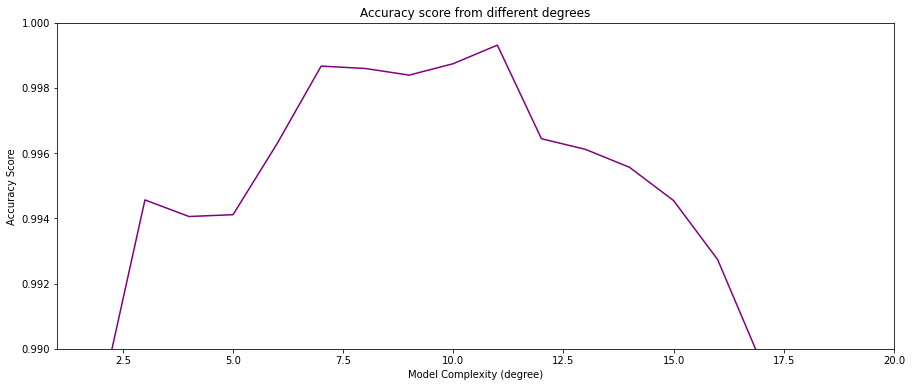

In [5]:
# Similar to the pipeline, this whole process can be simplified using cross_val_score function from sklearn, it uses k-folds method cross validation by default
from sklearn.model_selection import cross_val_score
import numpy as np

n = 20

hyper_average = [None] * n

for i in range(n):
    pipeline = make_pipeline(PolynomialFeatures(degree=i+1), LinearRegression())
    hyper_average[i] = np.mean(cross_val_score(pipeline, x_train, y_train, cv=5))

# Plus one because list are 0-indexed, unlike how we defined our dictionary
best_degree = hyper_average.index(max(hyper_average))
print("The best prediction degree is {}, with average accuracy of {}".format(best_degree+1, hyper_average[best_degree]))

plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 21), hyper_average, color="purple")
plt.xlabel("Model Complexity (degree)")
plt.ylabel("Accuracy Score")
plt.title("Accuracy score from different degrees")
plt.xlim(1, 20)
plt.ylim(0.990, 1)


## Conclusion: our best degree is 11

# Training (Parameter optimization)

In [6]:
import random

model = make_pipeline(PolynomialFeatures(degree=best_degree+1), LinearRegression())
model.fit(x_train, y_train)

print("Model training completed")
rand = np.array([[random.randint(10, 80)]])
print("Trying to predict a person with a weight of {} kg will have a height of {} cm".format(rand[0][0], round(model.predict(rand)[0][0], 2)))

Model training completed
Trying to predict a person with a weight of 47 kg will have a height of 156.71 cm


Text(0.5, 1.0, 'Height VS Weight')

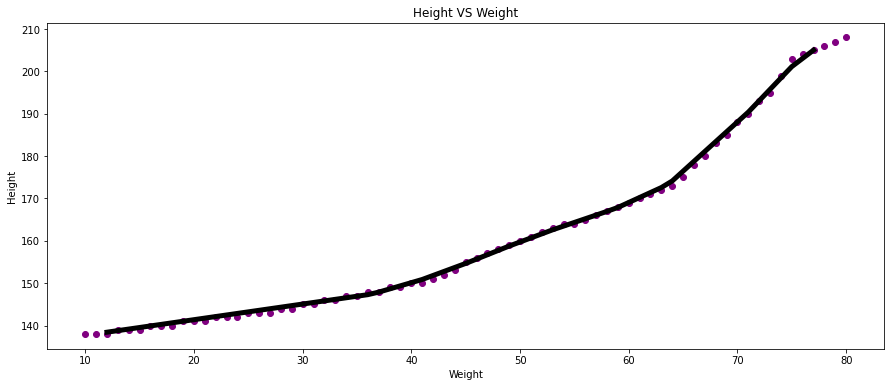

In [7]:
# How does it look like?

x_test = x_test.sort_values("Weight")
y_test = y_test.reindex(x_test.index)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.plot(x_test, model.predict(x_test), color="black", linewidth=5)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")

# Score

In [8]:
accuracy_score = model.score(x_test, y_test)
print("Model Accuracy: {}".format(round(accuracy_score, 4)))

Model Accuracy: 0.9987


# This is almost 100% correct everytime, the best we can do avoiding overfitting